# **Density Based Clustering**

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
def create_data_points(centroidLocation,
                       numSamples, clusterDeviation):
  x, y = make_blobs(n_samples=numSamples,
                    centers=centroidLocation, 
                    cluster_std=clusterDeviation)
  # standard features by removing the mean and scaling to unit variance
  x = StandardScaler().fit_transform(x)
  return x,y

In [4]:
x,y = create_data_points([[4,3],[2,-1],[-1,4]],
                         1500,0.5)

In [5]:
x,y

(array([[-1.14540826,  1.35055432],
        [-1.13154074,  0.91633436],
        [-1.40071726,  1.07900757],
        ...,
        [ 0.27074907, -1.44679315],
        [ 1.44351858,  0.76761836],
        [ 0.1300387 , -1.46870357]]), array([2, 2, 2, ..., 1, 0, 1]))

**Epsilon** : deetermines a specified radius that if includes enough data points withn, we can call it a dense area. <br>
**Minumum Samples** : determines the minimum number of data points we want in a neighbourhood to define a cluster. 

In [6]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(x)
labels = db.labels_
labels

array([0, 0, 0, ..., 1, 2, 1])

### **Distinguishing outliers**

In [7]:
# creating an array of booleans using labels from db.
core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [8]:
# number of clusters in labels, ignoring noise if present
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

3

In [9]:
unique_labels = set(labels)
unique_labels

{0, 1, 2}

### Data Visualisation

In [10]:
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


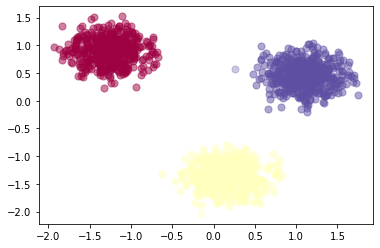

In [11]:
# Plotting points with colors:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
    class_member_mask = (labels == k)
    # plotting clustered datapoints
    xy = x[class_member_mask & core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1],s=50,c=[col],marker='o', alpha = 0.5)
    # plotting outliers 
    xy = x[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:,0], xy[:,1], s = 50, c = col, marker='o', alpha = 0.3)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


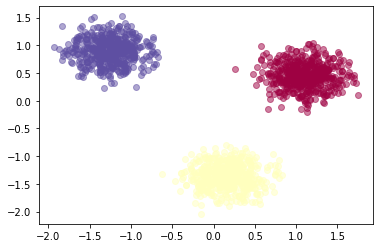

In [12]:
# Clustering same dataset using k-means
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(x)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(x[my_members, 0], x[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()

## **WEATHER STATION CLUSTERING USING DBSCAN AND SCIKIT-LEARN**

In [13]:
import pandas as pd

In [19]:
pdf = pd.read_csv('/content/weather-stations20140101-20141231.csv')
pdf.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,S%N,P,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,0.0,0.0,0.0,NaN,178.8,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,0.0,0.0,0.0,0.0,258.6,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,9.0,0.0,9.0,NaN,264.6,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,2.0,0.0,2.0,NaN,168.4,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [22]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop = True)

### **Visulatization**

In [26]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = (15,10)

ModuleNotFoundError: ignored